In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

This part of the project focuses on giving us a good understanding of the data we are working with. Before we get into the regression analysis, it is important that we do the EDA to investigate the data, identify patterns and outliers, and help us figure out what hypothesis to move forward with.

In [18]:
df = pd.read_csv("Cleaned TMDB Dataset.csv")
df.head()

,title,vote_average,vote_count,revenue,runtime,budget,popularity,genres,release_year
0,Inception,8.364,34495,825532764,148,160000000,83.952,Action,2010
1,Interstellar,8.417,32571,701729206,169,165000000,140.241,Adventure,2014
2,The Dark Knight,8.512,30619,1004558444,152,185000000,130.643,Drama,2008
3,Avatar,7.573,29815,2923706026,162,237000000,79.932,Action,2009
4,The Avengers,7.710,29166,1518815515,143,220000000,98.082,Science Fiction,2012


### 1) Let's see which movies have the highest revenue, lowest revenue, and also see if the data is skewed or if any outliers exist.

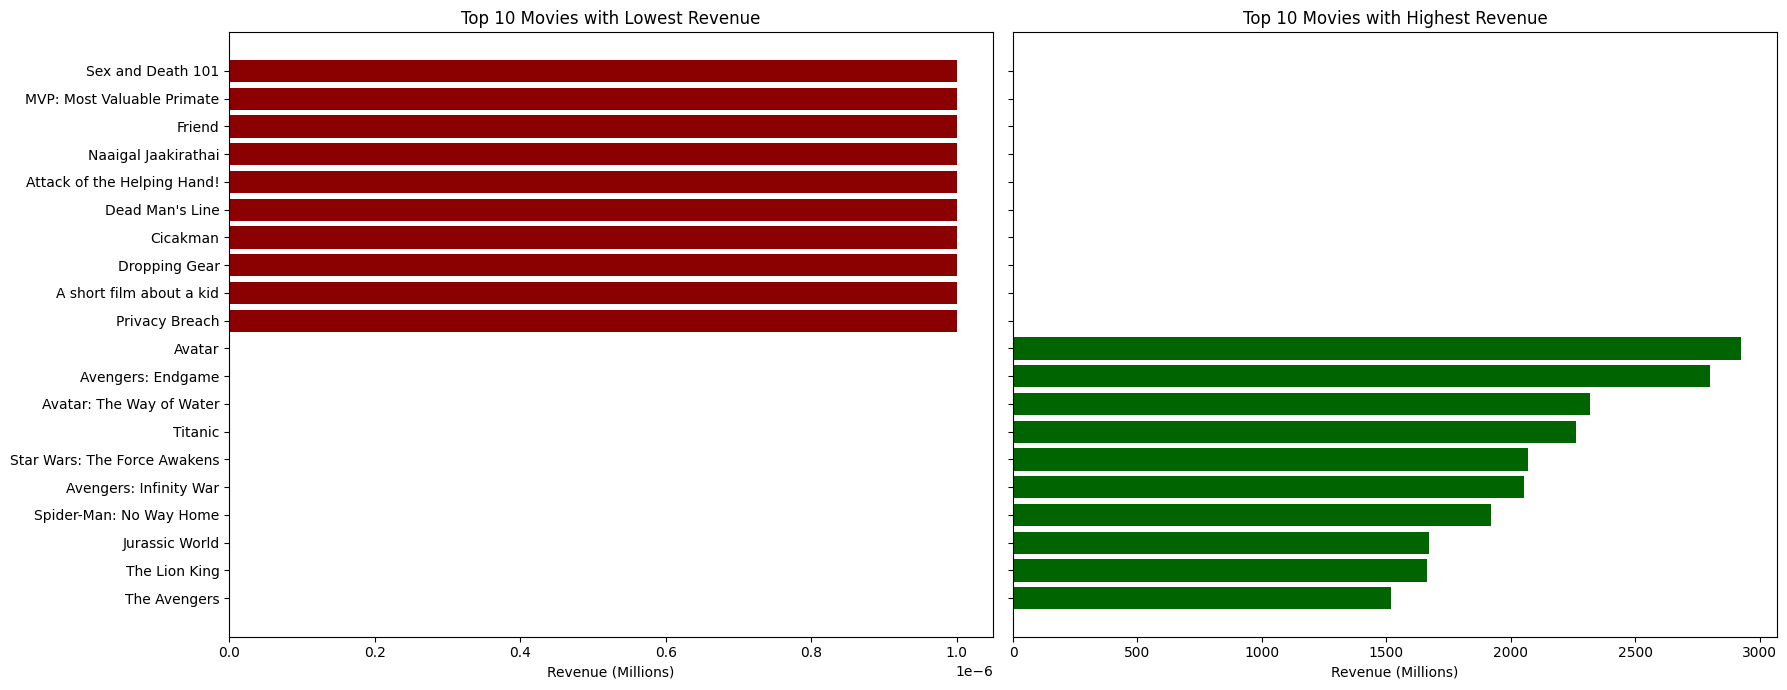

In [19]:
# Create plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Bottom 10 movies by revenue
bottom_10 = df.nsmallest(10, 'revenue')
axes[0].barh(bottom_10['title'], bottom_10['revenue'] / 1e6, color='darkred')
axes[0].set_title('Top 10 Movies with Lowest Revenue')
axes[0].set_xlabel('Revenue (Millions)')
axes[0].invert_yaxis()  

# Top 10 movies by revenue
top_10 = df.nlargest(10, 'revenue')
axes[1].barh(top_10['title'], top_10['revenue'] / 1e6, color='darkgreen')
axes[1].set_title('Top 10 Movies with Highest Revenue')
axes[1].set_xlabel('Revenue (Millions)')

plt.tight_layout()
plt.show()


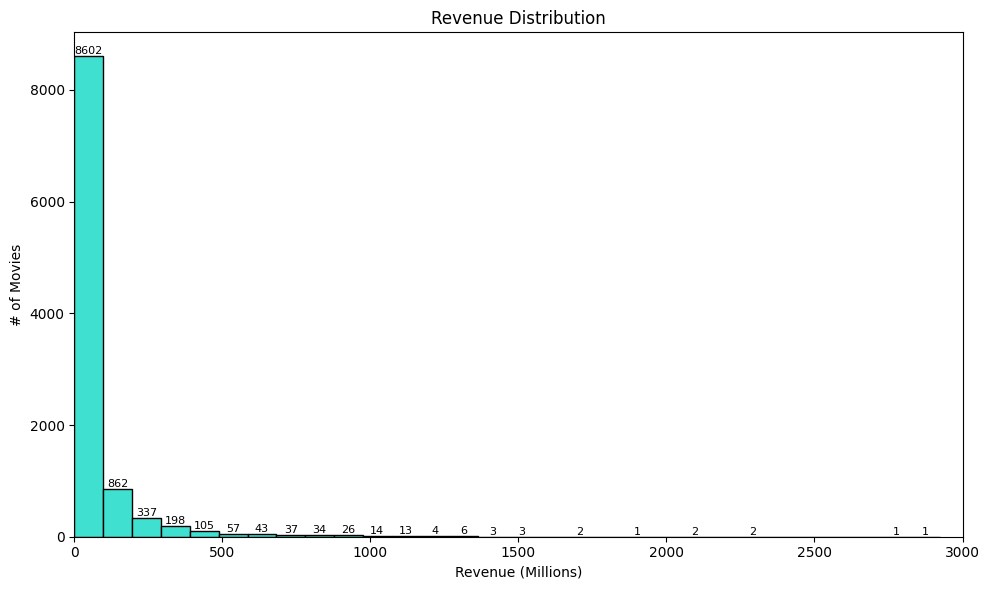

In [20]:
# Create plot
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['revenue'] / 1e6, bins=30, color='turquoise', edgecolor='black')  
plt.title("Revenue Distribution")
plt.xlabel("Revenue (Millions)")
plt.ylabel("# of Movies")
plt.xlim([0, 3000]) 

# Add labels
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Takeaways:
- The distribution is right skewed.
- We see that most of the movies have made revenue between 0-100 million but there is still a significant amount of movies which made much more.
- There are some extreme outliers including movies which made over 2.5 billion in revenue.

###  2) Let's visualize the relationship between revenue and genre.

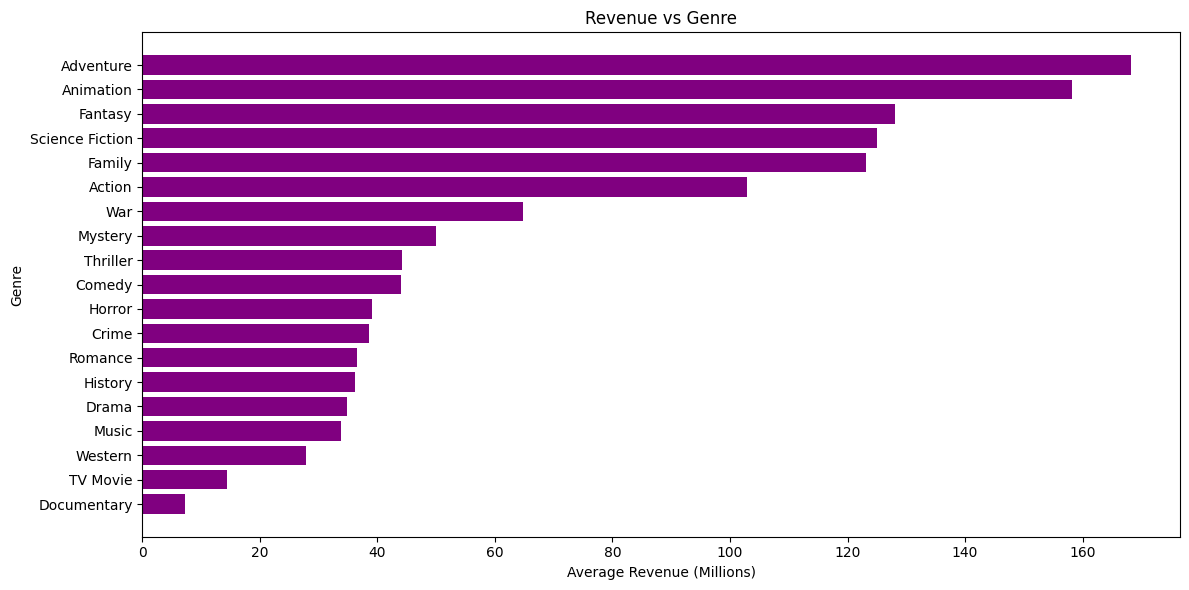

In [21]:
# Calculate average revenue per genre
genre_revenue = (df.groupby('genres')['revenue'].mean() / 1e6).sort_values()

# Create plot
plt.figure(figsize=(12, 6))
plt.barh(genre_revenue.index, genre_revenue.values, color='purple')
plt.title("Revenue vs Genre")
plt.xlabel("Average Revenue (Millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

Takeaways:
-  Adventure and Animation have the highest average revenue by a significant amount but there is still a decent spread in the data.
-  We can say that genre has potential to be an informative and useful categorical explanatory variable in our linear regression model where revenue would be the response.

### 3) Let's visualize the relationship between revenue and budget.

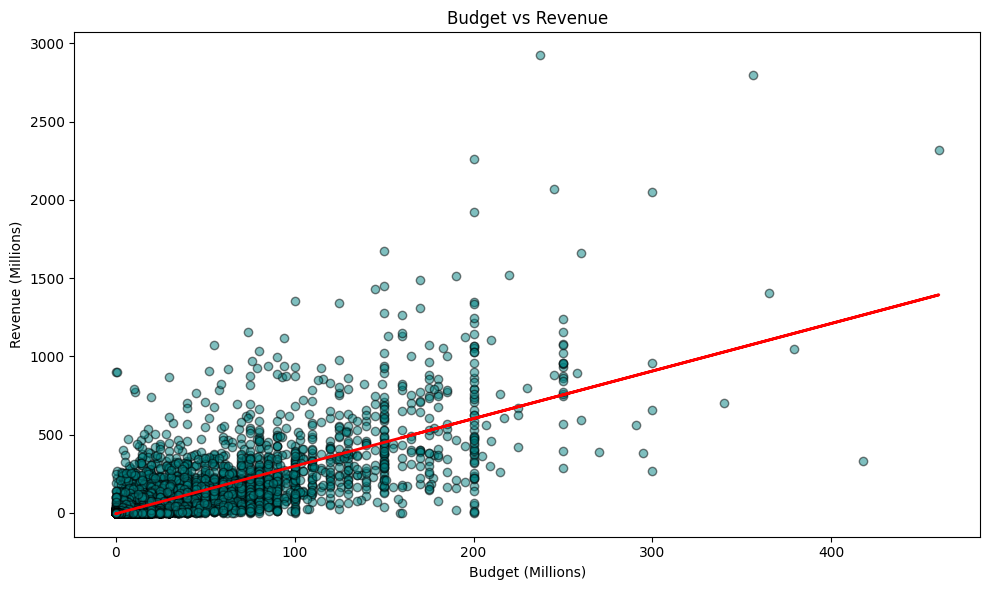

In [ ]:
# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'] / 1e6, df['revenue'] / 1e6, alpha=0.5, color='teal', edgecolor='k')
plt.title("Budget vs Revenue")
plt.xlabel("Budget (Millions)")
plt.ylabel("Revenue (Millions)")

# Add trendline
z = np.polyfit(df['budget'] / 1e6, df['revenue'] / 1e6, 1)
p = np.poly1d(z)
plt.plot(df['budget'] / 1e6, p(df['budget'] / 1e6), color='red', linewidth=2)

plt.tight_layout()
plt.show()

Takeaways:
- Considering the positive slope of the trendline, we can say that higher budgets are usually associated with higher revenue.
- Budget should definitely be involved as an explanatory variable in our upcoming regression model after seeing this relationship.

### 4) Let's visualize the relationship between revenue and popularity 

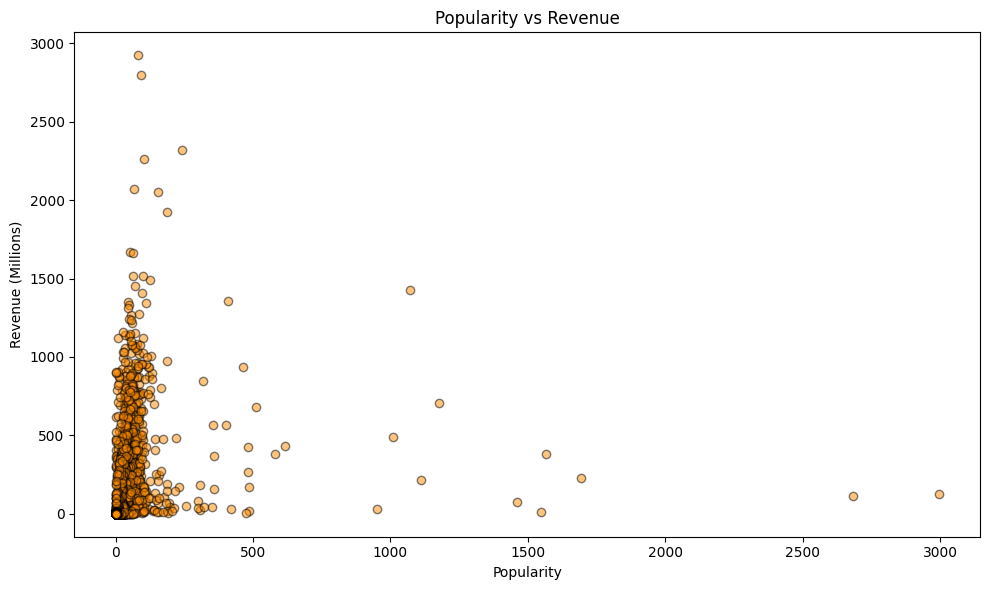

In [23]:
# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['revenue'] / 1e6, alpha=0.5, color='darkorange', edgecolor='k')
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue (Millions)")
plt.tight_layout()
plt.show()

Takeaways
- There is no visible linear relationship between popularity and revenue as there is not visible upward or downward trend
- All the points are clustered in one area
- Popularity might not be a meaningful explanatory variable in our model

### 5) Correlation Heatmap

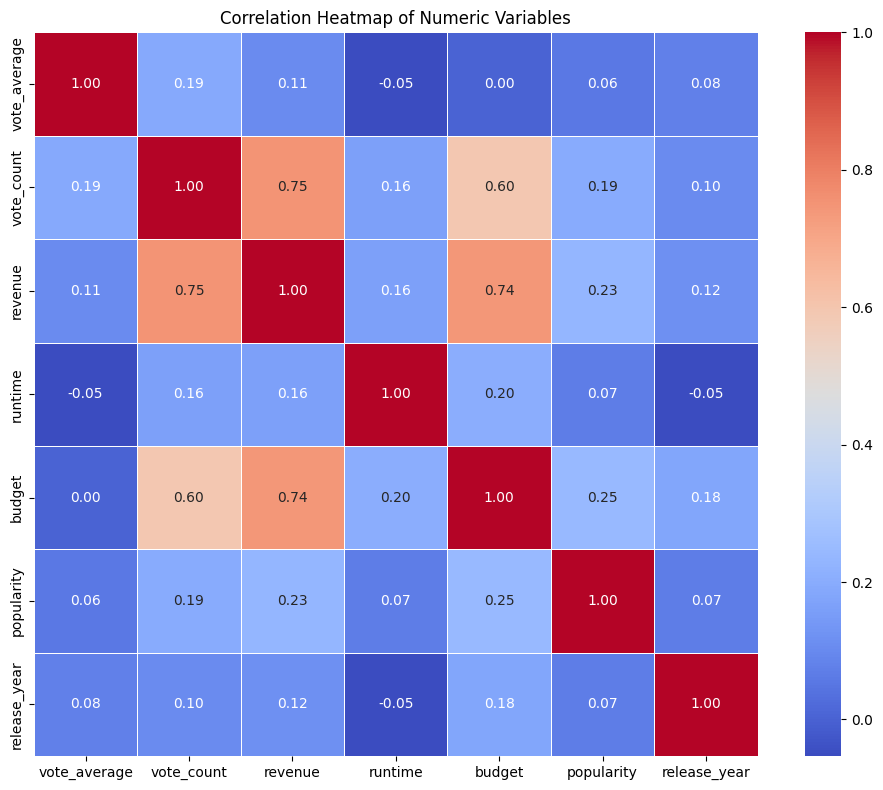

In [24]:
corr_ceof = df.select_dtypes(include='number').corr(numeric_only=True)

# Create plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_ceof, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

Takeaways:
- Revenue has a strong positive correlation with budget and vote count which was to be expected.
- Many explanatory variates have a weak correlation with revenue meaning they wouldn't be meaningful independently within our regression model but perhaps more as an interaction.
- I've already mentioned that revenue will be the response variable in our model. However, after checking the relationships between explanatory variables, there seems to be no strong red flags for multicollinearity besides the relationship between budget and vote count.